# Машинное обучение 1, ПМИ ВШЭ

## Семинар 1. Разновидности данных и типы задач машинного обучения

На лекции мы обсуждали, что наиболее распространенными задачами машинного обучения являются классификация и регрессия. Но жизнь, как водится, богаче книги, и для каждого домена данных существует множество специфичных задач, которые с разной степенью успешности решаются специалистами в сфере МО.

In [1]:
!pip install torchaudio >> /dev/null

‘ЁбвҐ¬Ґ ­Ґ г¤ Ґвбп ­ ©вЁ гЄ § ­­л© Їгвм.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 18})
sns.set_style('whitegrid')

## Синтетические/геометрические данные

- Мы точно знаем все зависимости между целевой переменной и признаками, посколько задаем их сами
- Хорошо подходят для визуализации работы алгоритмов

**Внимание!** Образец хорошего оформления графика.

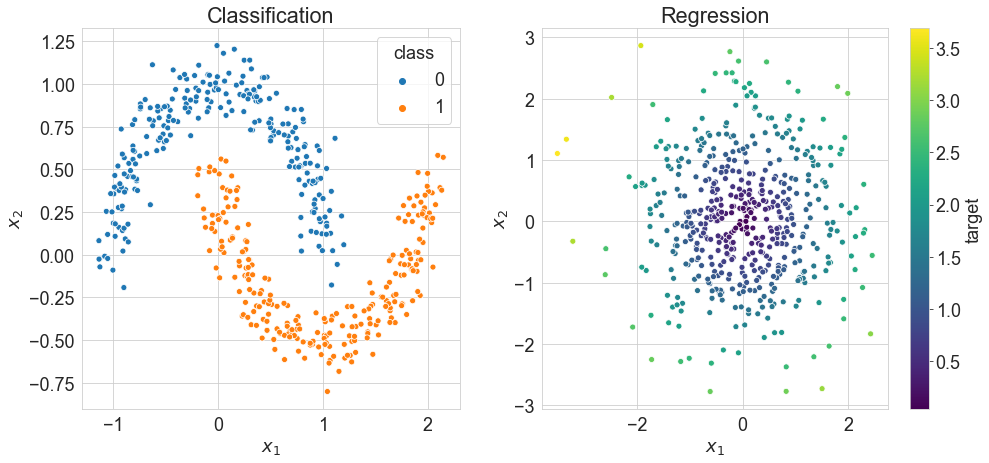

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.1, random_state=0)
fig, axs = plt.subplots(figsize=(16, 7), nrows=1, ncols=2, gridspec_kw={'width_ratios': [1.75, 2]})
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axs[0])

X = np.random.randn(500, 2)
y = np.sqrt((X ** 2).sum(axis=1))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axs[1], palette='viridis')

axs[0].legend(title='class')
axs[0].set_title('Classification')

norm = plt.Normalize(y.min(), y.max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

axs[1].get_legend().remove()
axs[1].figure.colorbar(sm, label='target')
axs[1].set_title('Regression')

for ax in axs:
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

plt.show()

## Табличные данные

Конечно, мы могли бы взять любые данные и представить их в качестве таблицы, но здесь речь идет о канонически табличных данных, когда все признаки имеют разную природу и в каком-то смысле являются отдельными, "осмысленными" измерениями. 
- Это один из самых распространненых типов данных, и в курсе МО-1 90% времени мы будем работать с таблицами
- Обычно признаки делятся на вещественные и категориальные.

In [4]:
from sklearn.datasets import load_boston

X = load_boston()
X = pd.DataFrame(data=np.concatenate((X['data'], X['target'].reshape(-1, 1)), axis=1),
                 columns=list(X['feature_names']) + ['target'])
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Изображения

Направление машинного обучения, которое имеет дело с изображениями, называется компьютерным зрением (Computer Vision, CV). Как правило, изображения представляют в виде тензоров размерности $(H, W, C)$, где обычно $C = 3$. Содержание тензора зависит от цветового пространства, чаще всего используется RGB. 

In [22]:
!wget -O C:\Users\Дмитрий\hse_ds\image.jpg https://krasivosti.pro/uploads/posts/2021-06/1623727983_11-krasivosti_pro-p-milie-yezhiki-zhivotnie-krasivo-foto-11.jpg 

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [21]:
from skimage import io, color
from skimage.transform import resize

rgb_image = resize(io.imread('image.jpg'), (512, 512))
fix, axs = plt.subplots(figsize=(20, 6), nrows=1, ncols=4)
axs[0].imshow(rgb_image)

red_image = np.copy(rgb_image)
red_image[..., 1:] = 0.0
axs[1].imshow(red_image)

green_image = np.copy(rgb_image)
green_image[..., [0, 2]] = 0.0
axs[2].imshow(green_image)

blue_image = np.copy(rgb_image)
blue_image[..., :2] = 0.0
axs[3].imshow(blue_image)

for ax in axs:
    ax.grid(False)
    ax.axis('off')

for ax, title in zip(axs, ['Original', 'Red', 'Green', 'Blue']):
    ax.set_title(title)

plt.tight_layout()
plt.show()

FileNotFoundError: No such file: 'C:\Users\Дмитрий\hse_ds\image.jpg'

Иногда используют и другие цветовые пространства, например, Lab (канал светлоты и два цветовых канала).

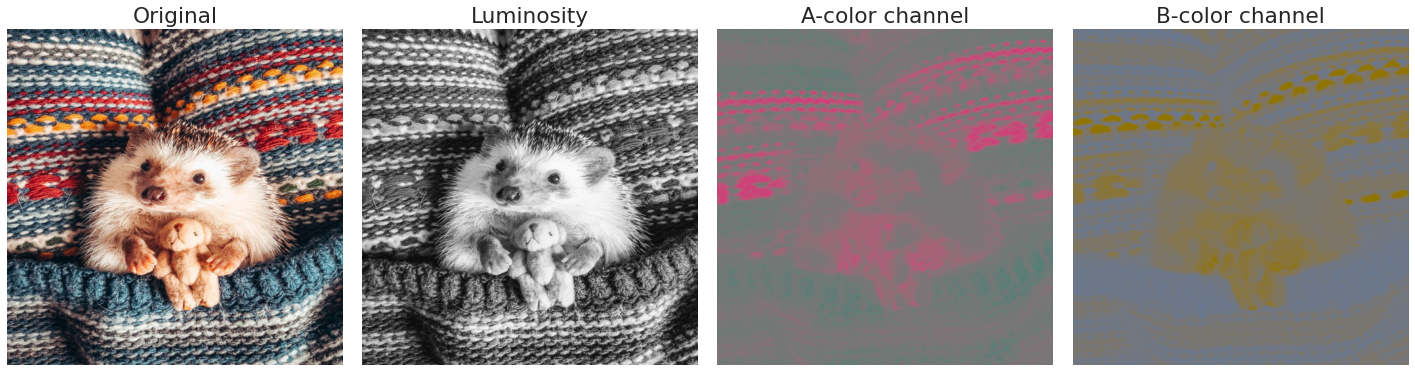

In [ ]:
lab_image = color.rgb2lab(rgb_image)
fix, axs = plt.subplots(figsize=(20, 6), nrows=1, ncols=4)
axs[0].imshow(rgb_image)

l_image = np.copy(lab_image)
l_image[..., 1:] = 0.0
axs[1].imshow(color.lab2rgb(l_image))

a_image = np.copy(lab_image)
a_image[..., 0] = 50
a_image[..., 2] = 0
axs[2].imshow(color.lab2rgb(a_image))

b_image = np.copy(lab_image)
b_image[..., 0] = 50
b_image[..., 1] = 0
axs[3].imshow(color.lab2rgb(b_image))

for ax in axs:
    ax.grid(False)
    ax.axis('off')

for ax, title in zip(axs, ['Original', 'Luminosity', 'A-color channel', 'B-color channel']):
    ax.set_title(title)

plt.tight_layout()
plt.show()

### Задачи:

**Классификация (classification)** (ImageNet, CIFAR-10/100, MNIST)


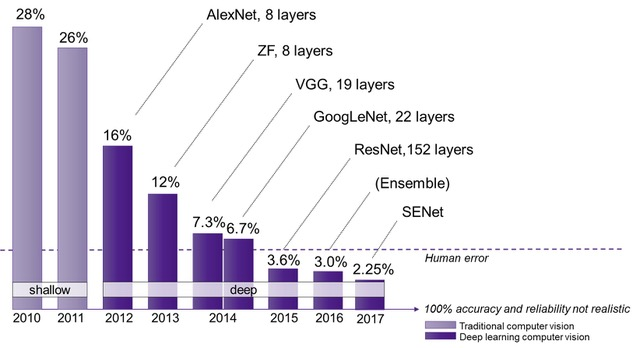

**Семантическая сегментация (semantic segmentation)** (PASCAL VOC, Cityscapes)


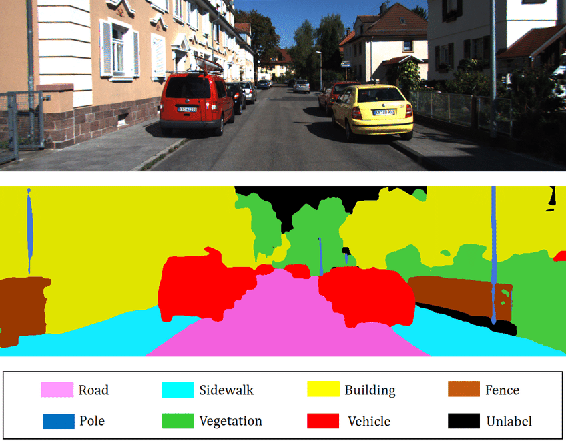

**Детекция объектов (object detection)** (COCO, PASCAL VOC)


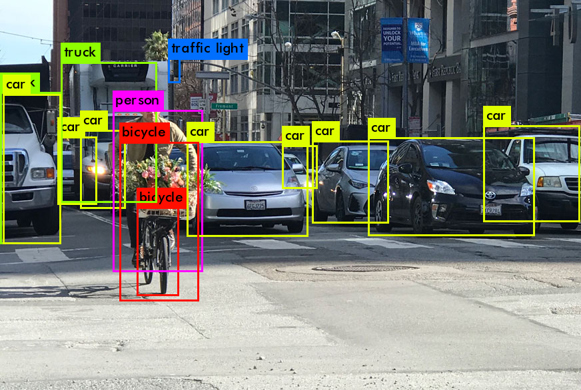

И многие-многие другие, такие как **оценка позы (pose estimation)**, **реконструкция сцены (scene reconstruction)** и т.д.

Также встречаются разного рода генеративные задачи, такие как **перенос стиля (style transfer)** или **повышение разрешения (super-resolution)**.


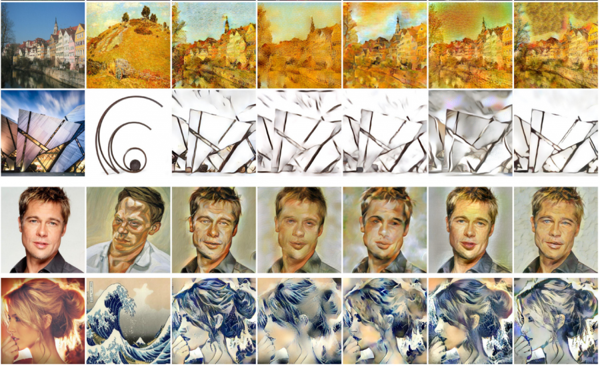

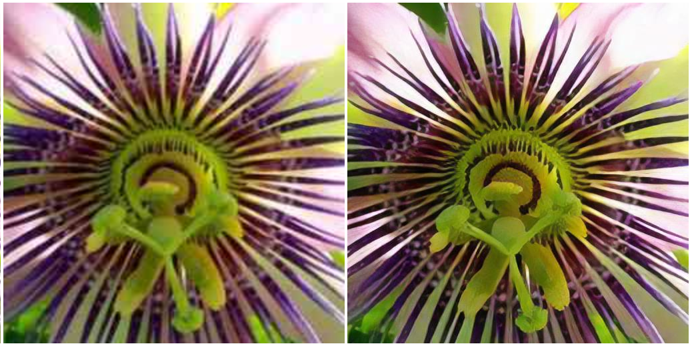

## Текстовые данные

Обработка естественного языка (Natural Language Processing, NLP) - одно из наиболее востребованных направлений в машинном обучении. Зачастую методы из NLP перекочевывают в другие домены данных и находят там успешное применение. Основными особенностями текстовых данных являются, во-первых, их дискретность, а во-вторых, последовательная структура. Как правило, при работе с текстом его токенизируют (по символам, по словам или по сочетаниям символов -- так называемый byte-pair-encoding, BPE), а затем каждому токену присваивается некоторый вектор-эмбеддинг. Такое преобразование позволяет обрабатывать дискретные данные непрерывными моделями.

В последнее время также развиваются инструменты работы с данными, которые похожи на тексты, но таковыми не являются. Например, появляются новые задачи и данные, связанные с обработкой программного кода. 

## Задачи:

- **Машинный перевод (machine translation)** (WMT, IWSLT)
- **Обобщение текста (text summarization)** (GigaWord, arXiv)
- **Моделирование языка (language modelling)** (WikiText)
- **Генерация текста (text generation)** (MATH, COCO Captions)
- **Ответы на вопросы (question answering)** (SQuAD, WikiQA)
- **Определение части речи (part-of-speech tagging, POS)** (Penn Treebank)
- **Анализ эмоциональной окраски (sentiment analysis)** (SST, IMDb)


## Аудио

Аудиозаписи часто представляют как последовательность вещественных чисел из промежутка $[-1, 1]\,$ (wav-формат). Такие аудио могут быть как одноканальными, так и многоканальными. При работе с музыкой популярен MIDI-формат. Но наиболее часто встречаются спектрограммы -- результат применения к звуковой волне преобразования Фурье или его вариаций.

In [ ]:
import librosa
import torch
import torchaudio
from IPython.display import Audio

waveform, sample_rate = librosa.load(librosa.example('trumpet'))
waveform = torch.from_numpy(waveform)
Audio(waveform, rate=sample_rate)

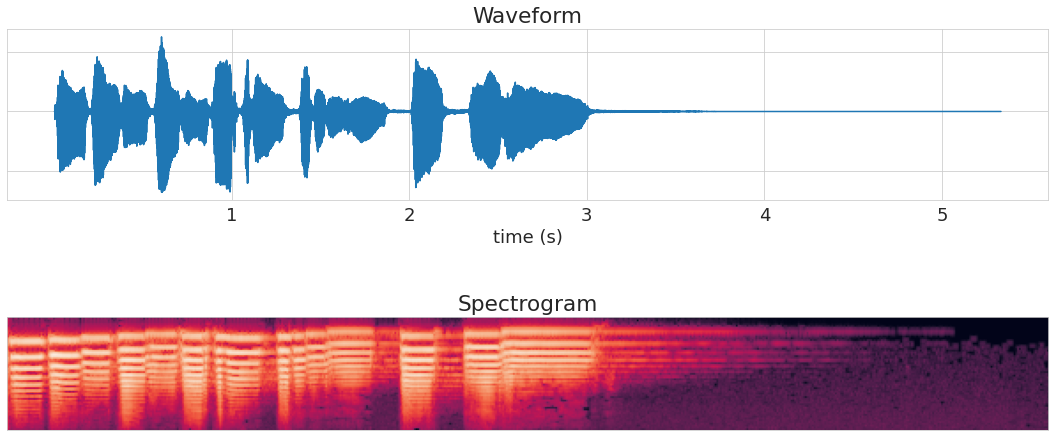

In [ ]:
spectrogramer = torchaudio.transforms.MelSpectrogram(n_mels=64, sample_rate=sample_rate)
spec = spectrogramer(waveform.unsqueeze(0)).squeeze(0)

fig, axs = plt.subplots(figsize=(15, 8), nrows=2, ncols=1, gridspec_kw={'height_ratios': [1, 2]})
axs[0].plot(waveform)
axs[1].imshow(torch.log(spec + 1e-9))

pos = (np.arange(1, 6, 1) * sample_rate).astype(int)
axs[0].set_xticks(pos)
axs[0].xaxis.set_ticklabels([str(i) for i in range(1, 6)])
axs[0].yaxis.set_ticklabels([])
axs[0].set_xlabel('time (s)')
axs[0].set_title('Waveform')

axs[1].grid(False)
axs[1].xaxis.set_ticklabels([])
axs[1].yaxis.set_ticklabels([])
axs[1].set_title('Spectrogram')

plt.tight_layout()
plt.show()

### Задачи

- **Распознавание речи (automatic speech recognition, asr, speech-to-text)** (LJSpeech, LibriSpeech)
- **Синтез речи (text-to-speech, tts)**
- **Генерация музыки (music generation)**
- **Устранение шумов, улучшение речи (denoising, speech enhancement)**
- **Распознавание ключевых слов (keyword spotting, kws)**

## Видео

Работа с видео-файлами похожа на работу с изображениями: к 2 пространственным размерностям и размерности цветовых каналов добавляется время. Иногда в контексте видео рассматривают и звуковую дорожку. В целом, для видео актуальны все те же задачи, что и для изображений, с поправкой на наличие изменений сцены во времени. Среди специфичных задач можно упомянуть **optical flow** (отслеживание движения пикселей на кадрах) и **object tracking** (отслеживание движущихся объектов).



In [ ]:
from IPython.display import Image
Image(url='https://nanonets.com/blog/content/images/2019/04/sparse-vs-dense.gif')

## Графовые данные

Иногда данные имеют явную или неявную графовую структуру (например, молекулы как графы атомов или профили в социальных сетях), и при обработке было бы полезно использовать это дополнительное знание. Задачи на графах можно разделить на два типа:

1. Задачи на уровне вершин (например, определение социальной роли)
2. Задачи на уровне графов (например, классификация молекул)

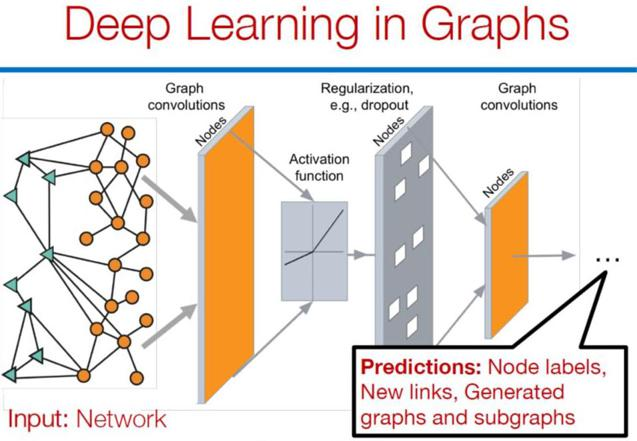

## Многодоменные задачи

Совершенствование моделей машинного обучения и рост вычислительных мощностей привели к появлению задач, затрагивающих несколько доменов данных. Вспомним задачи обработки звука: распознавание и синтез речи, по сути, представляют собой перевод из звукового домена в текстовый и обратно. Существуют примеры комбинирования текста и изображений: это Visual Question Answering (VQA) -- ответы на вопросы по изображению или text-to-image generation -- генерация изображения по текстовому запросу. Подобные задачи решаются с помощью очень больших и сложных моделей, а также требуют огромного числа данных и вычислительного бюджета. Здесь же можно вспомнить про беспилотники, которые так же обрабатывают данные очень разной природы.